In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
%matplotlib inline

%run "../datasets/parse.ipynb"
train_df = parse_train("../")
test_df = parse_test("../")

In [32]:
train_df.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horario Economico (kWh)',
       'Autoconsumo (kWh)', 'Injecao na rede (kWh)', 'dt', 'city_name', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level',
       'grnd_level', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all',
       'weather_description'],
      dtype='object')

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horario Economico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injecao na rede (kWh)    11016 non-null  object 
 6   dt                       11016 non-null  int64  
 7   city_name                11016 non-null  object 
 8   temp                     11016 non-null  float64
 9   feels_like               11016 non-null  float64
 10  temp_min                 11016 non-null  float64
 11  temp_max                 11016 non-null  float64
 12  pressure                 11016 non-null  int64  
 13  sea_level                11016 non-null  object 
 14  grnd_level            

In [34]:
train_df.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.0,0.0,0.0,None,1632873600,local,13.97,13.54,11.45,14.04,1027,,,81,1.96,,87,overcast clouds
1,2021-09-29,1,0.0,0.0,0.0,None,1632877200,local,13.48,13.02,13.43,13.90,1028,,,82,1.83,,91,overcast clouds
2,2021-09-29,2,0.0,0.0,0.0,None,1632880800,local,12.93,12.47,12.72,13.43,1027,,,84,1.96,,93,overcast clouds
3,2021-09-29,3,0.0,0.0,0.0,None,1632884400,local,12.61,12.15,10.34,12.93,1027,,,85,1.85,,95,overcast clouds
4,2021-09-29,4,0.0,0.0,0.0,None,1632888000,local,12.61,12.17,9.79,12.93,1027,,,86,1.83,,93,overcast clouds


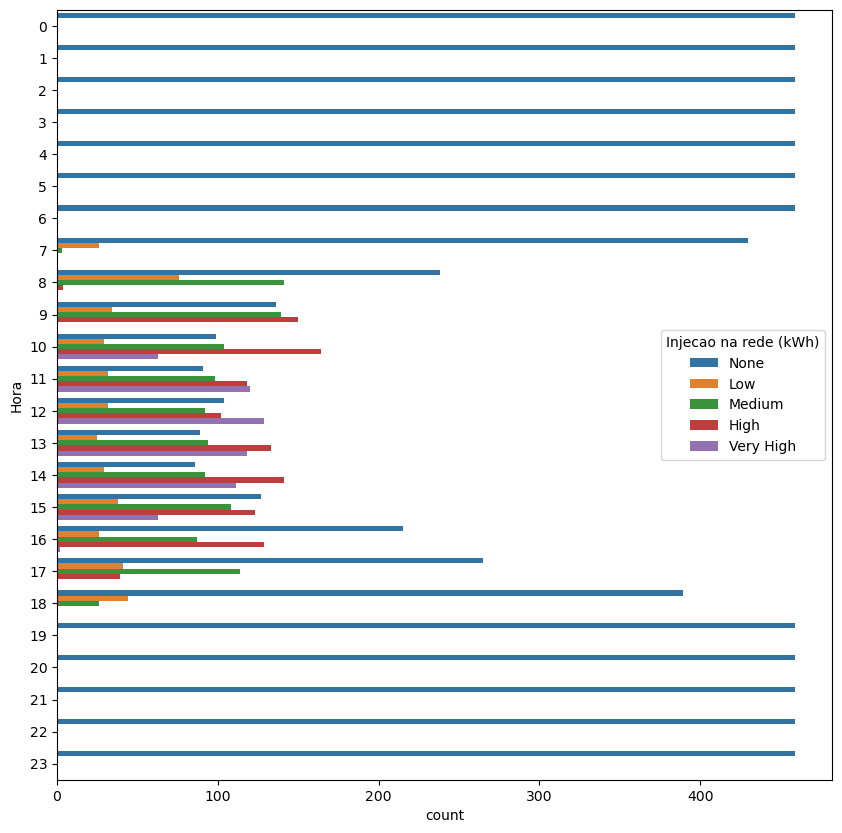

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.countplot(y='Hora', data=train_df, hue='Injecao na rede (kWh)')

plt.show()

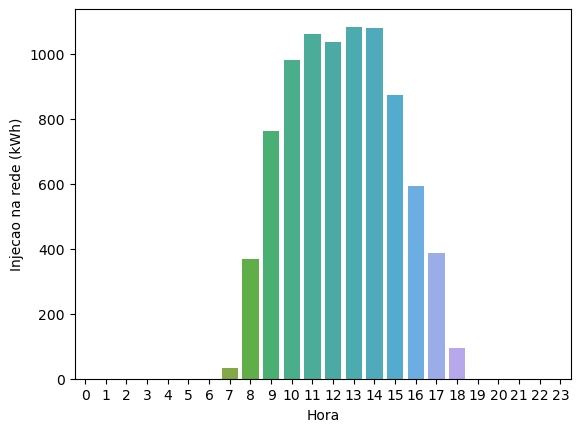

In [36]:
categorical_to_numerical = {
    'Injecao na rede (kWh)': {
        'None': 0,
        'Low': 1,
        'Medium': 2,
        'High':3,
        'Very High':4
    }
}

train_df.replace(categorical_to_numerical, inplace=True)

sum_df = train_df.groupby('Hora')['Injecao na rede (kWh)'].sum().reset_index()

sns.barplot(y='Injecao na rede (kWh)', x='Hora', data=sum_df)
plt.show()

In [37]:
def convert_record_date(df: pd.DataFrame) -> pd.DataFrame:
    df_ = df.copy()

    record_date = pd.DatetimeIndex(df_['Data'])

    df_.drop('Data', axis=1, inplace=True)

    df_['hour'] = record_date.hour
    df_['day'] = record_date.day
    df_['month'] = record_date.month
    df_['weekday'] = record_date.weekday
    df_['hour'] = record_date.hour

    return df_

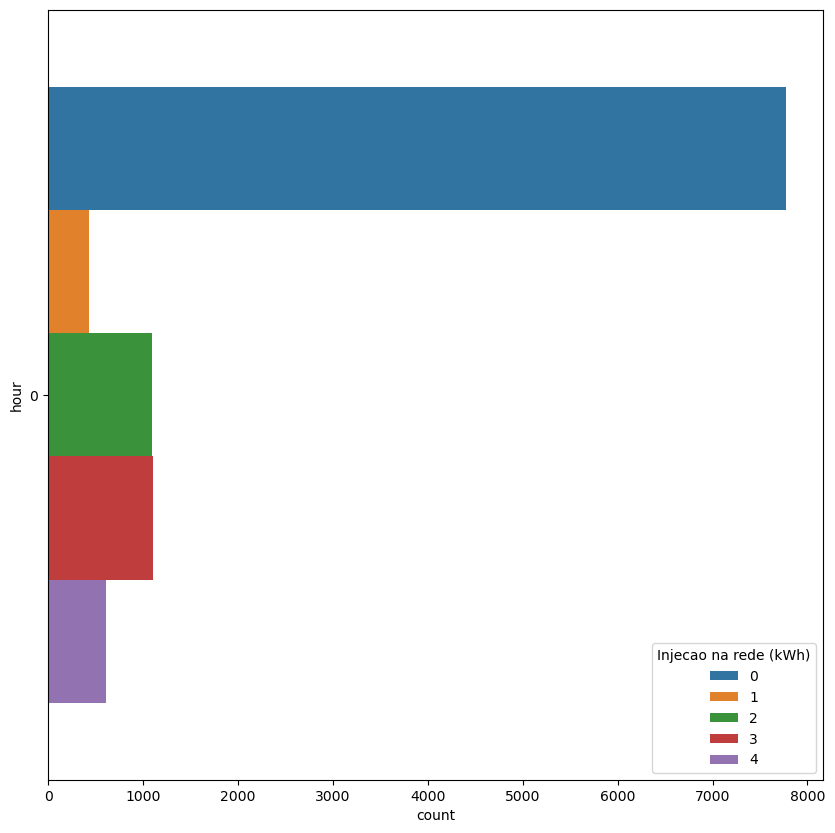

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))

train_df_copy = convert_record_date(train_df.copy())

#est = KBinsDiscretizer(n_bins=3, strategy='quantile', encode='ordinal')
#train_df_copy['hour'] = est.fit_transform(train_df_copy[['hour']])

sns.countplot(y='nivel', data=train_df_copy, hue='Injecao na rede (kWh)')

plt.show()

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain'],
      dtype='object')


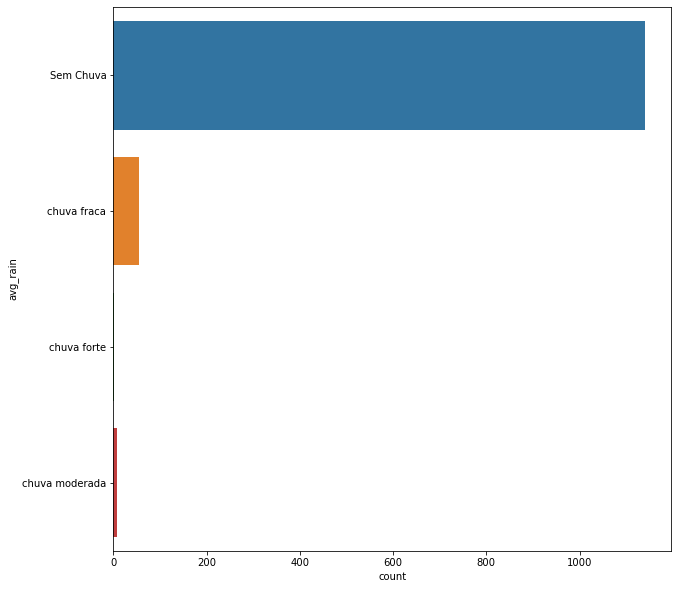

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

train_df_copy = test_df.copy()

print(train_df_copy.columns)

sns.countplot(y='avg_rain', data=train_df_copy)

plt.show()